#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- 


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/competitions/crime-cast-forecasting-crime-categories/data?select=train.csv
- The data consists of 22 column and  rows 20000.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [95]:
df = pd.read_csv('data/crime_data.csv')

#### Show Top 5 Records

In [96]:
df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03-09-2020 00:00,03-06-2020 00:00,1800,15,N Hollywood,1563,...,75,M,W,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345,13,Newton,1367,...,41,M,H,216,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605,13,Newton,1343,...,67,M,B,501,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11-08-2020 00:00,11-06-2020 00:00,1800,19,Mission,1924,...,61,M,H,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130,12,77th Street,1245,...,0,X,X,401,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


#### Shape of the dataset

In [97]:
df.shape

(20000, 22)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  int64  
 7   Area_ID                20000 non-null  int64  
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  int64  
 10  Part 1-2               20000 non-null  int64  
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  int64  
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

### 2.2 Dataset information

### 3. Data Checks to perform

- Check Missing values and handle them
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [99]:
df.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [100]:
df=df.drop('Cross_Street',axis=1) # almost 80% of dataset is null
df['Modus_Operandi']=df['Modus_Operandi'].fillna(df['Modus_Operandi'].mode()[0])
df['Victim_Sex']=df['Victim_Sex'].fillna(df['Victim_Sex'].mode()[0])
df['Victim_Descent']=df['Victim_Descent'].fillna(df['Victim_Descent'].mode()[0])
df=df.drop('Premise_Description',axis=1)  # each unique value of Premise_Description is  encoded to Premise_Code
df['Weapon_Used_Code']=df['Weapon_Used_Code'].fillna(0.0) # as the na values in Weapon_Used_Code and Weapon_Description means that the weapon is not reported or Unknown so coded it to 0.0
df=df.drop('Weapon_Description',axis=1) #Weapon_Description encoded into Weapon_Used_Code
df=df.drop('Area_Name',axis=1) # encoded into Area_ID
df=df.drop('Status_Description',axis=1) # encoded into Status


In [101]:
df.isna().sum()

Location                 0
Latitude                 0
Longitude                0
Date_Reported            0
Date_Occurred            0
Time_Occurred            0
Area_ID                  0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Weapon_Used_Code         0
Status                   0
Crime_Category           0
dtype: int64

#### There are no missing values in the data set now

### 3.2 Check Duplicates

In [102]:
df.duplicated().sum()

np.int64(13)

### 13 duplicate rows 

In [103]:
df=df.drop_duplicates()

In [104]:
df.duplicated().sum()

np.int64(0)

### 3.3 Check data types

In [105]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19987 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               19987 non-null  object 
 1   Latitude               19987 non-null  float64
 2   Longitude              19987 non-null  float64
 3   Date_Reported          19987 non-null  object 
 4   Date_Occurred          19987 non-null  object 
 5   Time_Occurred          19987 non-null  int64  
 6   Area_ID                19987 non-null  int64  
 7   Reporting_District_no  19987 non-null  int64  
 8   Part 1-2               19987 non-null  int64  
 9   Modus_Operandi         19987 non-null  object 
 10  Victim_Age             19987 non-null  int64  
 11  Victim_Sex             19987 non-null  object 
 12  Victim_Descent         19987 non-null  object 
 13  Premise_Code           19987 non-null  int64  
 14  Weapon_Used_Code       19987 non-null  float64
 15  Status 

### 3.4 Checking the number of unique values of each column

In [106]:
df.nunique()

Location                 12399
Latitude                  3622
Longitude                 3578
Date_Reported              811
Date_Occurred              366
Time_Occurred              996
Area_ID                     21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                 100
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Weapon_Used_Code            58
Status                       5
Crime_Category               6
dtype: int64

### Convert the data types of columns that are categorical but currently have a dtype of int or float to object.

In [107]:
col=['Area_ID','Reporting_District_no','Part 1-2','Premise_Code','Weapon_Used_Code']
df[col]=df[col].astype('object')


### 3.5 Check statistics of data set

In [108]:
df.describe()

,Latitude,Longitude,Time_Occurred,Victim_Age
count,19987.000000,19987.000000,19987.000000,19987.000000
mean,33.940599,-117.892777,1352.428779,30.149497
std,2.127496,7.380116,645.997471,21.861242
min,0.000000,-118.663400,1.000000,-2.000000
25%,34.009200,-118.429700,930.000000,12.000000
50%,34.058700,-118.322900,1430.000000,31.000000
75%,34.165050,-118.274400,1900.000000,46.000000
max,34.328100,0.000000,2359.000000,99.000000


#### Insights

- The data suggests a concentration of incidents in Southern California with a significant number occurring in the afternoon.
- The average victim is in their early 30s, but the data may contain errors (e.g., negative age values) that should be cleaned for accurate analysis.
- The age distribution indicates that both minors and older adults are victims, highlighting the need for targeted interventions based on age demographics.

In [109]:
df= df[df['Victim_Age']>=0]

### 3.7 Exploring Data

In [110]:
df.head()

,Location,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category
0,4500 CARPENTER AV,34.1522,-118.3910,03-09-2020 00:00,03-06-2020 00:00,1800,15,1563,1,385,75,M,W,101,0.0,IC,Property Crimes
1,45TH ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345,13,1367,1,0906 0352 0371 0446 1822 0344 0416 0417,41,M,H,216,400.0,IC,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605,13,1343,2,0329 1202,67,M,B,501,0.0,IC,Property Crimes
3,14900 ORO GRANDE ST,34.2953,-118.4590,11-08-2020 00:00,11-06-2020 00:00,1800,19,1924,1,0329 1300,61,M,H,101,0.0,IC,Property Crimes
4,7100 S VERMONT AV,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130,12,1245,1,0416 0945 1822 0400 0417 0344,0,X,X,401,400.0,IC,Property Crimes


In [111]:
# define numerical & categorical columns
numeric_features = df.select_dtypes(include='number').columns.tolist()
categorical_features = df.select_dtypes(exclude='number').columns.tolist()

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Latitude', 'Longitude', 'Time_Occurred', 'Victim_Age']

We have 13 categorical features : ['Location', 'Date_Reported', 'Date_Occurred', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status', 'Crime_Category']


### 3.8 Extract Year,Month,Day and WeekDay from both Date_Reported and Date_Occurred

In [112]:
# Function to normalize date formats
def normalize_date(date_str):
    # Try parsing with the first format (MM/DD/YYYY)
    try:
        date_obj = datetime.strptime(date_str, '%m/%d/%Y %I:%M:%S %p')
    except ValueError:
        # If it fails, try parsing with the second format (MM-DD-YYYY)
        try:
            date_obj = datetime.strptime(date_str, '%m-%d-%Y %H:%M')
        except ValueError:
            return pd.NaT  # Return NaT if both formats fail
    return date_obj.strftime('%m-%d-%Y %H:%M')

# Apply the function to both date columns
df['Date_Reported'] =pd.to_datetime(df['Date_Reported'].apply(normalize_date))
df['Date_Occurred'] =pd.to_datetime(df['Date_Occurred'].apply(normalize_date))

# Function to convert Time_Occurred to hours
def convert_to_hours(time):
    # Extract hours and minutes
    hours = time // 100          # Integer division to get the hour
    minutes = time % 100         # Modulus to get the minutes
    # Convert to decimal format if needed
    return hours + minutes / 60   # Return total hours as a decimal

# Apply the function to the Time_Occurred column
df['Hours_Occurred'] = df['Time_Occurred'].apply(convert_to_hours)
df=df.drop('Time_Occurred',axis=1)

In [113]:
# Extract features from Date_Reported
df['Reported_Year'] = df['Date_Reported'].dt.year
df['Reported_Month'] = df['Date_Reported'].dt.month
df['Reported_Day'] = df['Date_Reported'].dt.day
df['Reported_Weekday'] = df['Date_Reported'].dt.weekday

# Extract features from Date_Occurred
df['Occurred_Year'] = df['Date_Occurred'].dt.year
df['Occurred_Month'] = df['Date_Occurred'].dt.month
df['Occurred_Day'] = df['Date_Occurred'].dt.day
df['Occurred_Weekday'] = df['Date_Occurred'].dt.weekday


In [114]:
# Calculate time difference in hours (or any other unit you prefer)
df['Time_Difference'] = (df['Date_Reported'] - df['Date_Occurred']).dt.total_seconds() / 3600  # in hours


In [115]:
df['Modus_Operandi_split']=df['Modus_Operandi'].apply(lambda x : x.split())
exploded_df=df.explode('Modus_Operandi_split')
exploded_df = exploded_df.rename(columns={'Modus_Operandi_Split': 'Modus_Operandi_Code'})
exploded_df = exploded_df.drop(columns=['Modus_Operandi'])


In [116]:
exploded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64683 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               64683 non-null  object        
 1   Latitude               64683 non-null  float64       
 2   Longitude              64683 non-null  float64       
 3   Date_Reported          64683 non-null  datetime64[ns]
 4   Date_Occurred          64683 non-null  datetime64[ns]
 5   Area_ID                64683 non-null  object        
 6   Reporting_District_no  64683 non-null  object        
 7   Part 1-2               64683 non-null  object        
 8   Victim_Age             64683 non-null  int64         
 9   Victim_Sex             64683 non-null  object        
 10  Victim_Descent         64683 non-null  object        
 11  Premise_Code           64683 non-null  object        
 12  Weapon_Used_Code       64683 non-null  object        
 13  Status

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

In [117]:
df.describe()

,Latitude,Longitude,Date_Reported,Date_Occurred,Victim_Age,Hours_Occurred,Reported_Year,Reported_Month,Reported_Day,Reported_Weekday,Occurred_Year,Occurred_Month,Occurred_Day,Occurred_Weekday,Time_Difference
count,19981.000000,19981.000000,19981,19981,19981.000000,19981.000000,19981.000000,19981.000000,19981.000000,19981.000000,19981.0,19981.000000,19981.000000,19981.000000,19981.000000
mean,33.940546,-117.892612,2020-07-20 17:32:46.568239872,2020-06-28 20:07:00.159151360,30.158951,13.640011,2020.061208,6.409689,15.791702,2.868475,2020.0,6.432361,15.568440,3.022371,525.429558
min,0.000000,-118.663400,2020-01-01 00:00:00,2020-01-01 00:00:00,0.000000,0.016667,2020.000000,1.000000,1.000000,0.000000,2020.0,1.000000,1.000000,0.000000,0.000000
25%,34.009200,-118.429700,2020-04-06 00:00:00,2020-03-29 00:00:00,12.000000,9.500000,2020.000000,3.000000,8.000000,1.000000,2020.0,3.000000,8.000000,1.000000,0.000000
50%,34.058700,-118.322700,2020-07-09 00:00:00,2020-06-28 00:00:00,31.000000,14.500000,2020.000000,6.000000,16.000000,3.000000,2020.0,6.000000,16.000000,3.000000,0.000000
75%,34.165000,-118.274400,2020-10-10 00:00:00,2020-09-28 00:00:00,46.000000,19.000000,2020.000000,9.000000,23.000000,5.000000,2020.0,9.000000,23.000000,5.000000,48.000000
max,34.328100,0.000000,2024-01-23 00:00:00,2020-12-31 00:00:00,99.000000,23.983333,2024.000000,12.000000,31.000000,6.000000,2020.0,12.000000,31.000000,6.000000,34488.000000
std,2.127813,7.381218,NaN,NaN,21.857713,6.460825,0.332893,3.452729,8.821557,1.971270,0.0,3.459922,8.941831,1.976805,2775.415172


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19981 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               19981 non-null  object        
 1   Latitude               19981 non-null  float64       
 2   Longitude              19981 non-null  float64       
 3   Date_Reported          19981 non-null  datetime64[ns]
 4   Date_Occurred          19981 non-null  datetime64[ns]
 5   Area_ID                19981 non-null  object        
 6   Reporting_District_no  19981 non-null  object        
 7   Part 1-2               19981 non-null  object        
 8   Modus_Operandi         19981 non-null  object        
 9   Victim_Age             19981 non-null  int64         
 10  Victim_Sex             19981 non-null  object        
 11  Victim_Descent         19981 non-null  object        
 12  Premise_Code           19981 non-null  object        
 13  Weapon

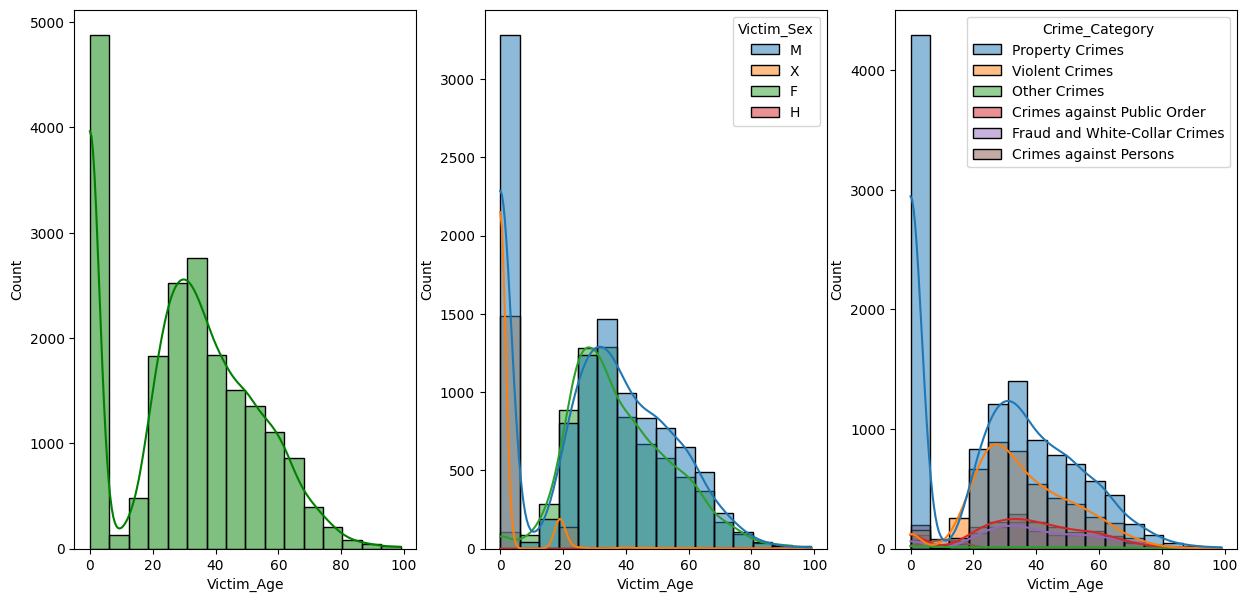

In [119]:
bins= int(np.ceil(np.log2(len(df['Victim_Age'])) + 1))  # Sturges' Rule
fig, axs =plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='Victim_Age',bins=bins,kde=True,color='g')
plt.subplot(132)
sns.histplot(data=df,x='Victim_Age',bins=bins,hue='Victim_Sex',kde=True)
plt.subplot(133)
sns.histplot(data=df,x='Victim_Age',bins=bins,hue='Crime_Category',kde=True)
plt.show()

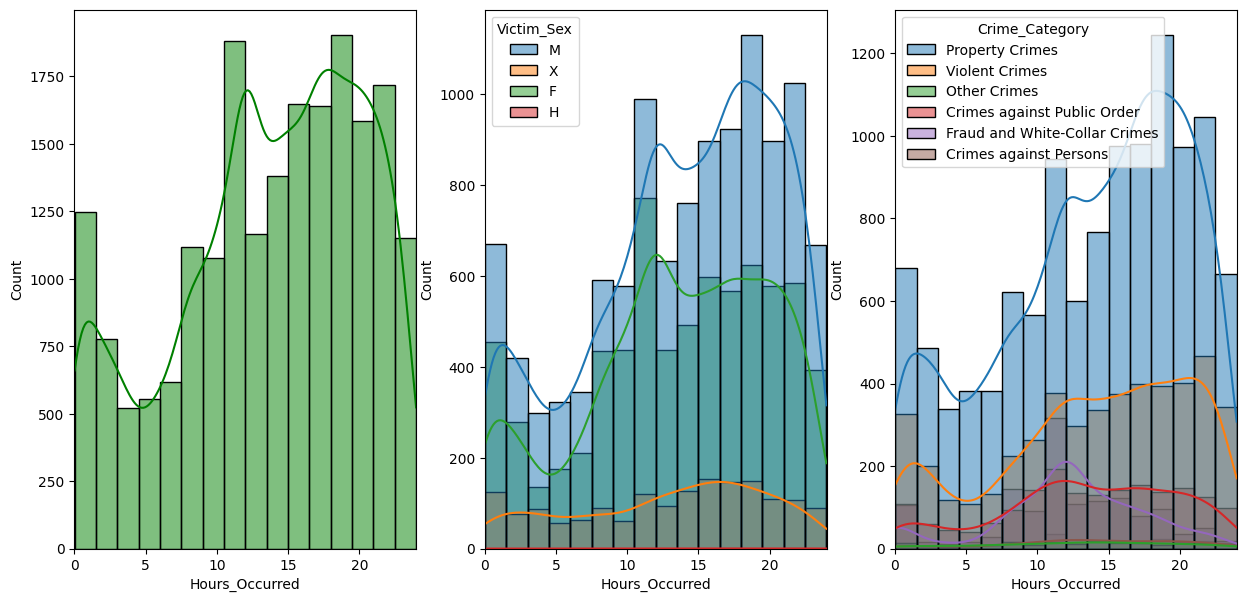

In [120]:
bins= int(np.ceil(np.log2(len(df['Hours_Occurred'])) + 1))  # Sturges' Rule
fig, axs =plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='Hours_Occurred',bins=bins,kde=True,color='g')
axs[0].set_xlim(0, 24)
plt.subplot(132)
sns.histplot(data=df,x='Hours_Occurred',bins=bins,hue='Victim_Sex',kde=True)
axs[1].set_xlim(0, 24)
plt.subplot(133)
sns.histplot(data=df,x='Hours_Occurred',bins=bins,hue='Crime_Category',kde=True)
axs[2].set_xlim(0, 24)
plt.show()

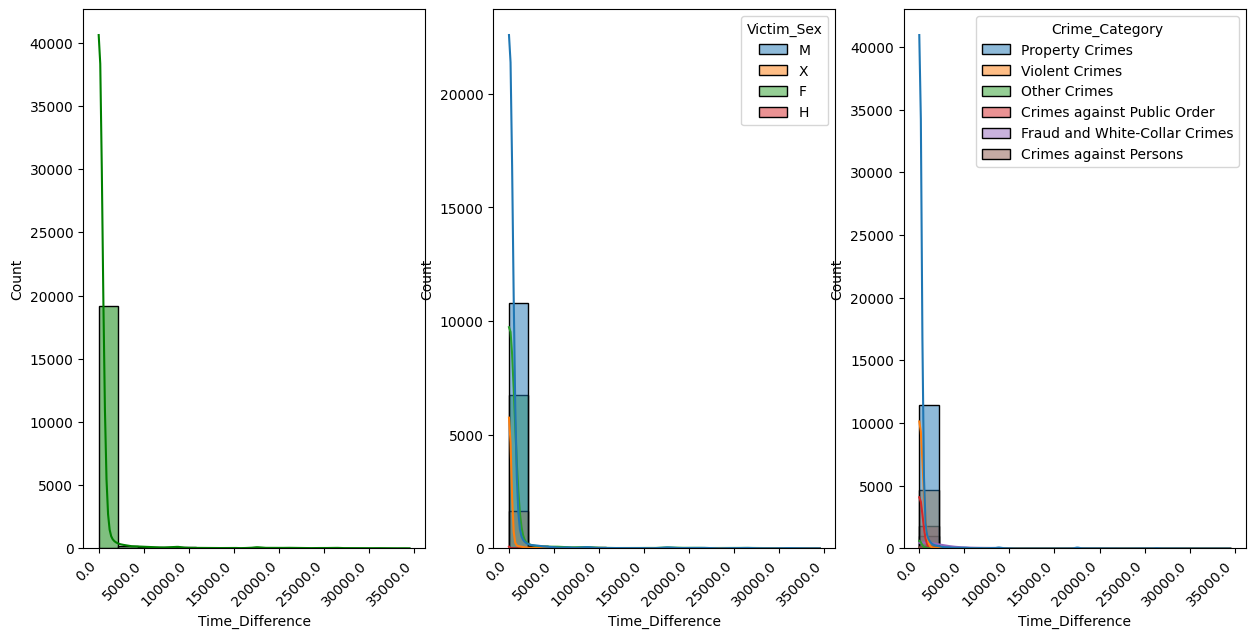

In [121]:
bins= int(np.ceil(np.log2(len(df['Time_Difference'])) + 1))  # Sturges' Rule
fig, axs =plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='Time_Difference',bins=bins,kde=True,color='g')
axs[0].set_xticklabels(axs[0].get_xticks(), rotation=45, ha='right')  

plt.subplot(132)
sns.histplot(data=df,x='Time_Difference',bins=bins,hue='Victim_Sex',kde=True)
axs[1].set_xticklabels(axs[1].get_xticks(), rotation=45, ha='right')  

plt.subplot(133)
sns.histplot(data=df,x='Time_Difference',bins=bins,hue='Crime_Category',kde=True)
axs[2].set_xticklabels(axs[2].get_xticks(), rotation=45, ha='right')  

plt.show()

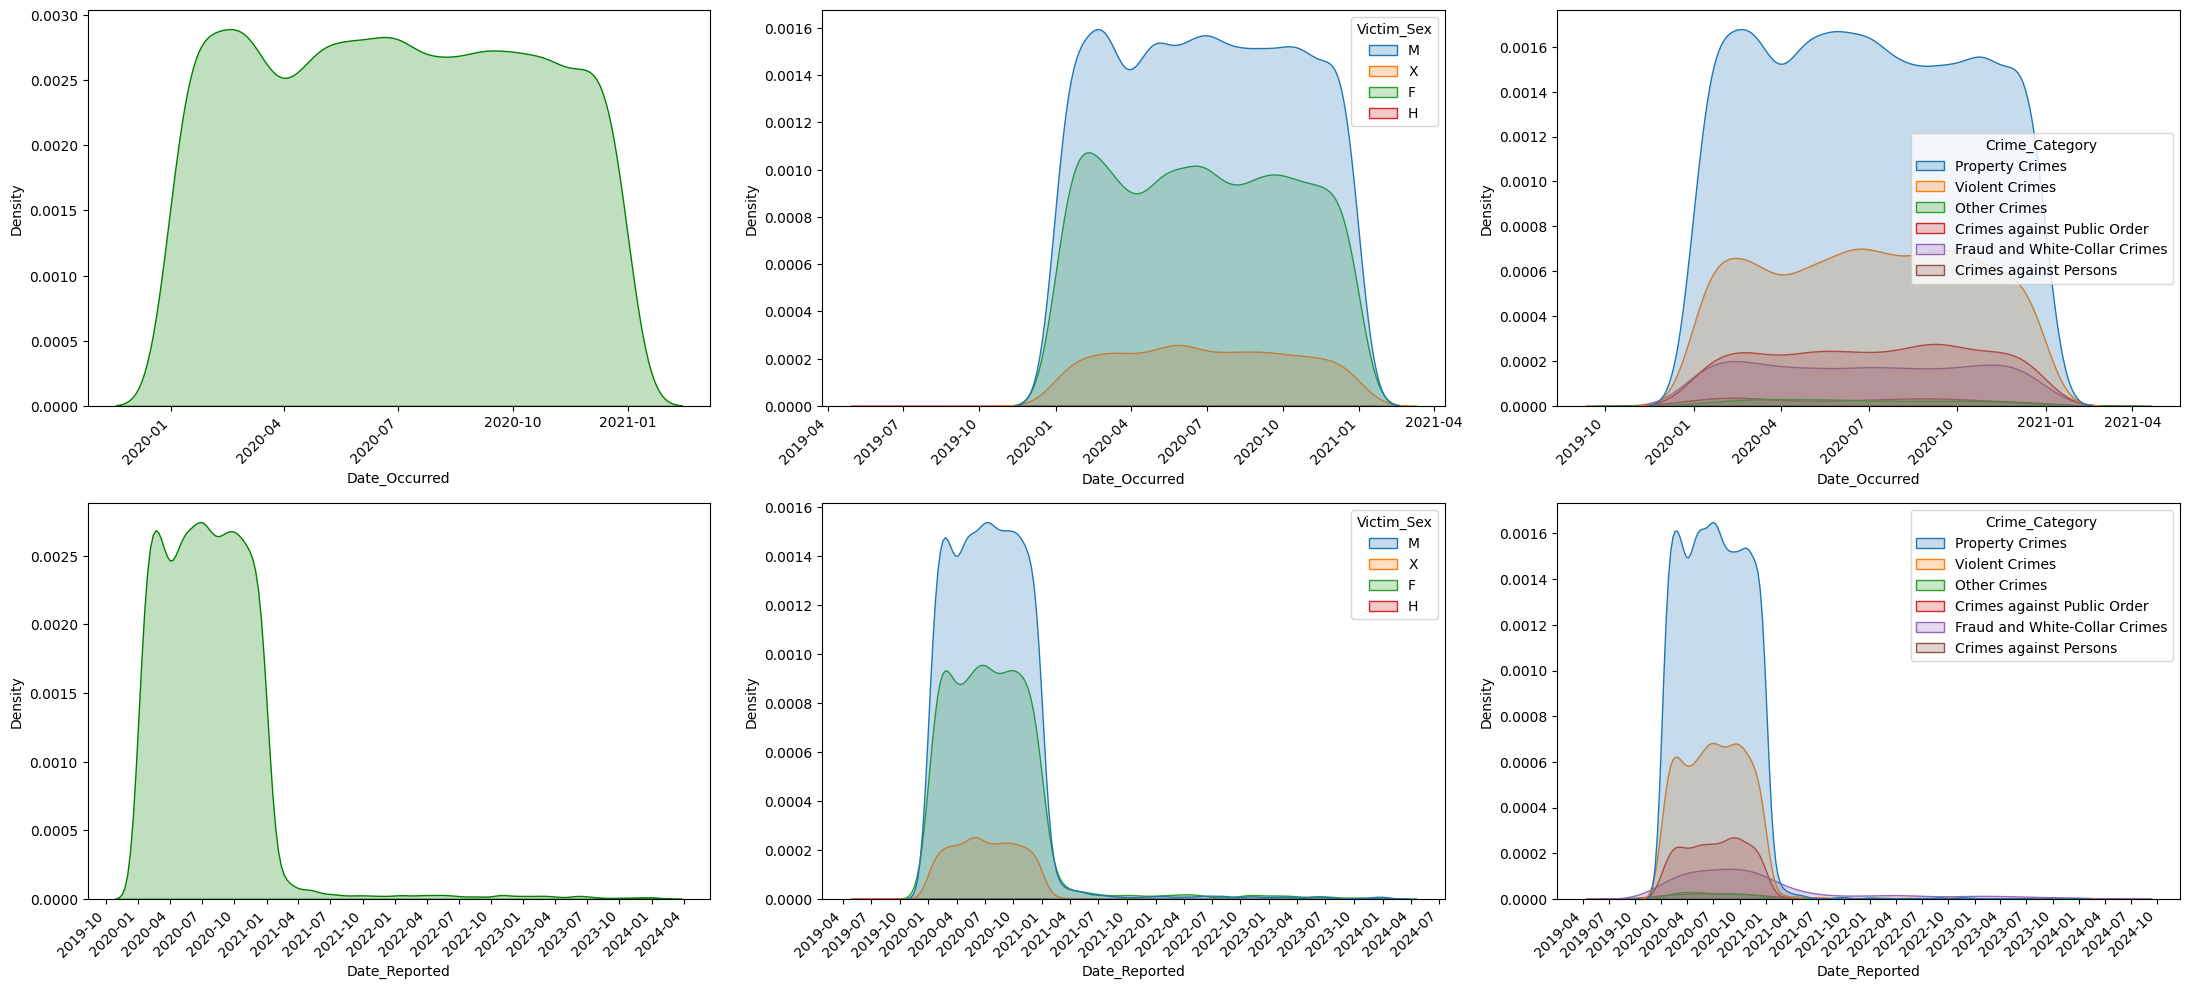

In [127]:
fig, axs = plt.subplots(2, 3, figsize=(22,10))


plt.subplot(231)
# KDE plot for Date_Occurred
sns.kdeplot(data=df, x='Date_Occurred', fill=True, color='g')

plt.subplot(232)
# KDE plot for Date_Occurred with Victim_Sex hue
sns.kdeplot(data=df, x='Date_Occurred', hue='Victim_Sex', fill=True)

plt.subplot(233)
# KDE plot for Date_Occurred with Crime_Category hue
sns.kdeplot(data=df, x='Date_Occurred', hue='Crime_Category', fill=True)

plt.subplot(234)
# KDE plot for Date_Reported
sns.kdeplot(data=df, x='Date_Reported', fill=True, color='g')

plt.subplot(235)
# KDE plot for Date_Reported with Victim_Sex hue
sns.kdeplot(data=df, x='Date_Reported', hue='Victim_Sex', fill=True)

plt.subplot(236)
# KDE plot for Date_Reported with Crime_Category hue
sns.kdeplot(data=df, x='Date_Reported', hue='Crime_Category', fill=True)


date_format = mdates.DateFormatter('%Y-%m')
interval = mdates.MonthLocator(interval=3)  

for ax in plt.gcf().axes:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(interval)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.show()


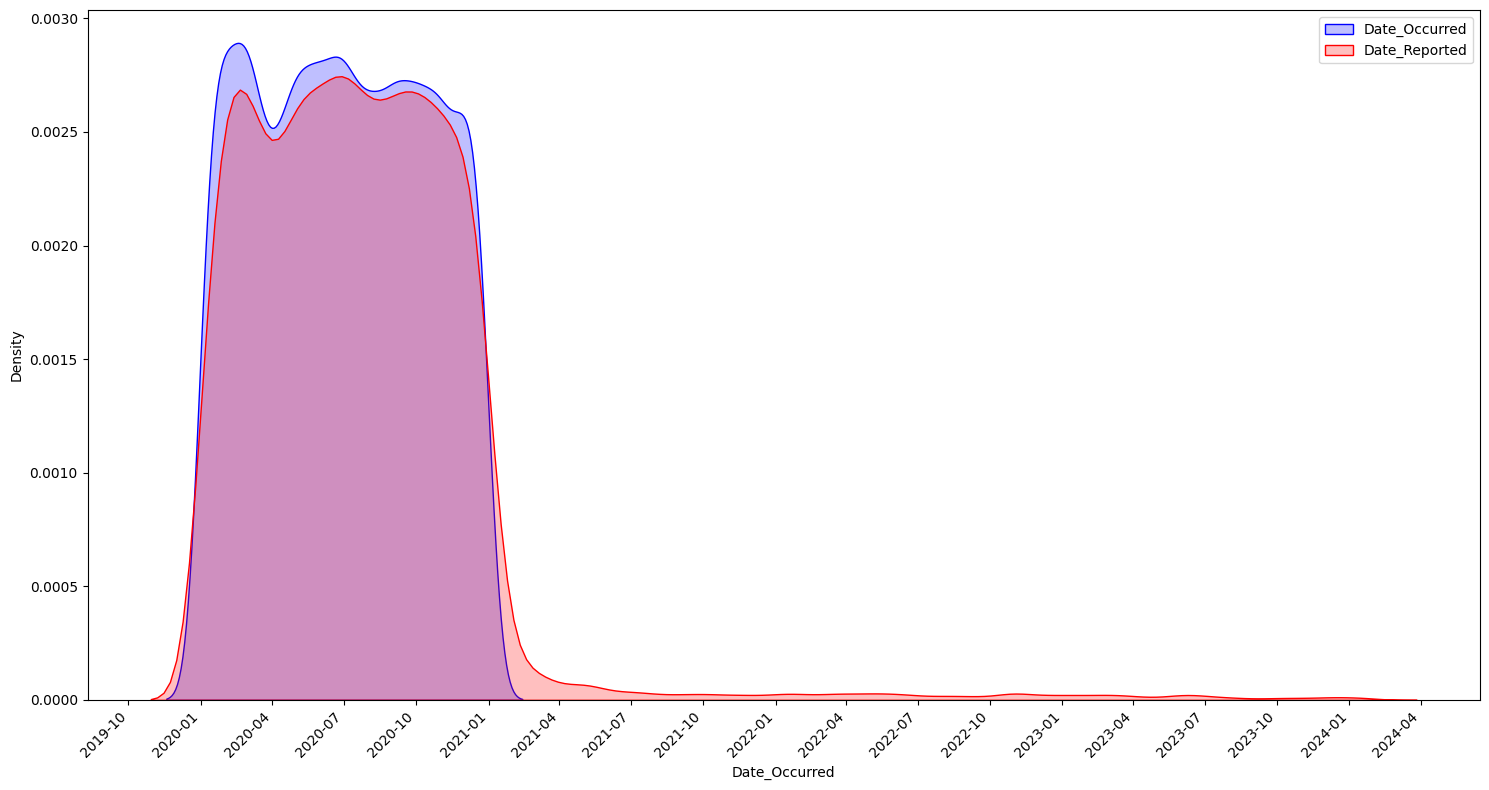

In [141]:
# Create a figure with a specified size
plt.figure(figsize=(15, 8))

# KDE plot for Date_Occurred and Date_Reported
sns.kdeplot(data=df, x='Date_Occurred', fill=True, color='blue', label='Date_Occurred')
sns.kdeplot(data=df, x='Date_Reported', fill=True, color='red', label='Date_Reported')
plt.legend()
# Formatting date axis
date_format = mdates.DateFormatter('%Y-%m')
interval = mdates.MonthLocator(interval=3)
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(interval)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()